# Assignment - 13 KNN ( Zoo)

## Import necessary data

In [1]:
import pandas as pd 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
zoo = pd.read_csv(r'D:\Downloads\Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


## Data Understanding

In [3]:
zoo.shape

(101, 18)

In [4]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

## Model Building

In [6]:
le = LabelEncoder()
zoo['animal name'] = le.fit_transform(zoo['animal name'])

In [7]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


<AxesSubplot:xlabel='animal name', ylabel='type'>

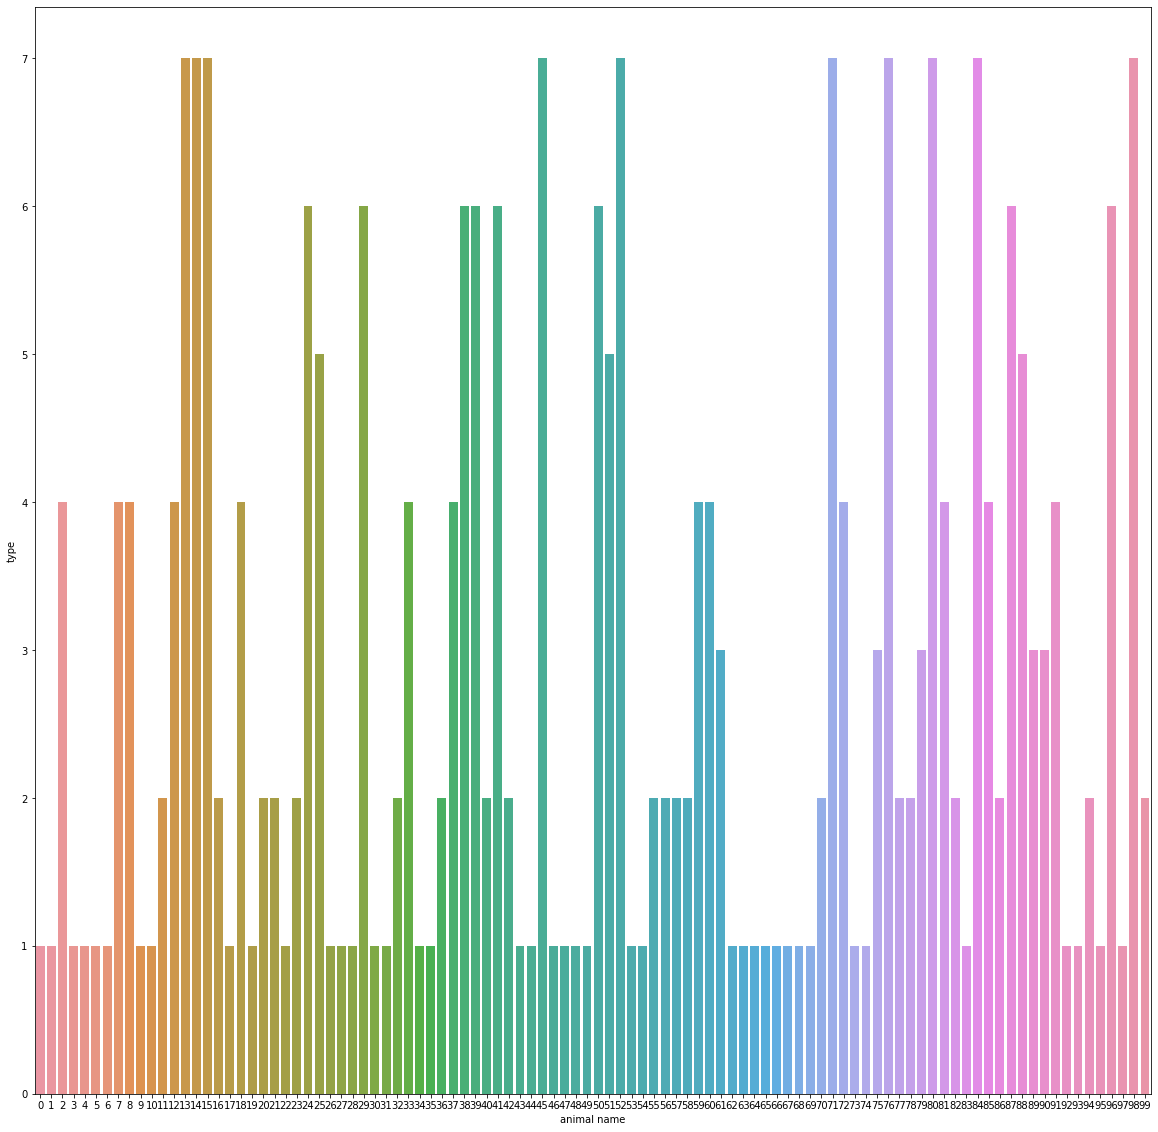

In [8]:
plt.figure(figsize=(20,20))
sns.barplot(x = 'animal name' , y = 'type' , data = zoo)

<AxesSubplot:xlabel='domestic', ylabel='count'>

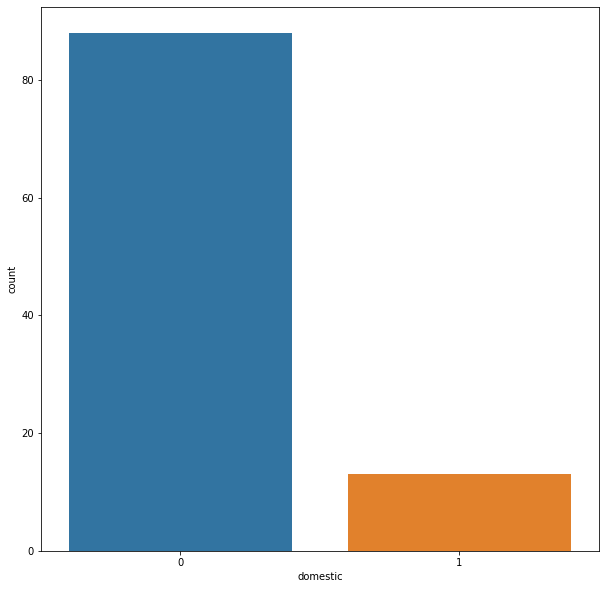

In [9]:
plt.figure(figsize=(10,10))
sns.countplot(x="domestic", data=zoo)

<AxesSubplot:xlabel='catsize', ylabel='count'>

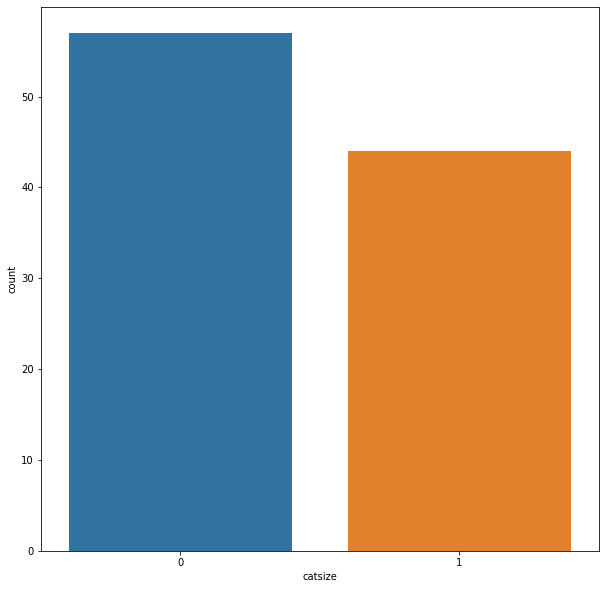

In [10]:
plt.figure(figsize=(10,10))
sns.countplot(x= 'catsize', data=zoo)

In [11]:
x = zoo.drop('type' , axis=1)
y = zoo[['type']]

In [12]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 12 , stratify = y)

In [13]:
x_train.shape , y_train.shape

((80, 17), (80, 1))

In [14]:
x_test.shape , y_test.shape

((21, 17), (21, 1))

## Model Training //  Model Testing  //  Model Evaluation

### Before Standardization

#### K = 3

In [15]:
model = KNeighborsClassifier(n_neighbors= 3)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test , y_pred)

0.42857142857142855

#### K = 6 

In [16]:
model = KNeighborsClassifier(n_neighbors= 6)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test , y_pred)

0.3333333333333333

### After Standardization

In [17]:
std_scaler = StandardScaler()
scaled_x = std_scaler.fit_transform(x)
x_train , x_test , y_train , y_test = train_test_split(scaled_x,y,test_size=0.20 , random_state= 12 , stratify=y)

#### K = 3

In [18]:
model1 = KNeighborsClassifier(n_neighbors= 3)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
accuracy_score(y_test , y_pred)

0.9523809523809523

#### K = 6

In [19]:
model1 = KNeighborsClassifier(n_neighbors= 6)
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
accuracy_score(y_test , y_pred)

0.9523809523809523